# <center> Практика. Статистические тесты в контексте EDA

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе анализа вы должны ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Какие факторы влияют на зарплату у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в разных компаниях?
- Была ли зарплата Data Scientist выше зарплаты Data Engineer за 2022 год?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
   - для одной выборки;
   - для двух выборок;
   - для нескольких выборок;
- тест для категориальных признаков.


На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Ответить на эти вопросы нам помогут данные о зарплатах в сфере Data Science за 2020-2022 годы.

Данные содержат следующие столбцы:
*   *work_year* — год работы;
*   *experience_level* — уровень опыта;
*   *employment_type* — тип занятости;
*   *job_title* — название рабочей профессии;
*   *salary* — зарплата;
*   *salary_currency* — денежная единица зарплаты;
*   *salary_in_usd* — зарплата в долларах;
*   *employee_residence* — страна проживания работника(сокращенное);
*   *remote_ratio* — дистанционное соотношение;
*   *company_location* — местонахождение компании;
*   *company_size* — размер компании.

Источник датасета: ["Data Science Job Salaries" (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## Загрузка данных

In [2]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

Данные присутствуют в работе 



In [3]:
# загружаем датасет
data = pd.read_csv('./ds_salaries.csv', index_col=0)

data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


В датасете 607 записей (без пропущенных значений).

Проверим данные на наличие полных дубликатов:

In [6]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 11)


### Распределение зарплаты по всем работникам


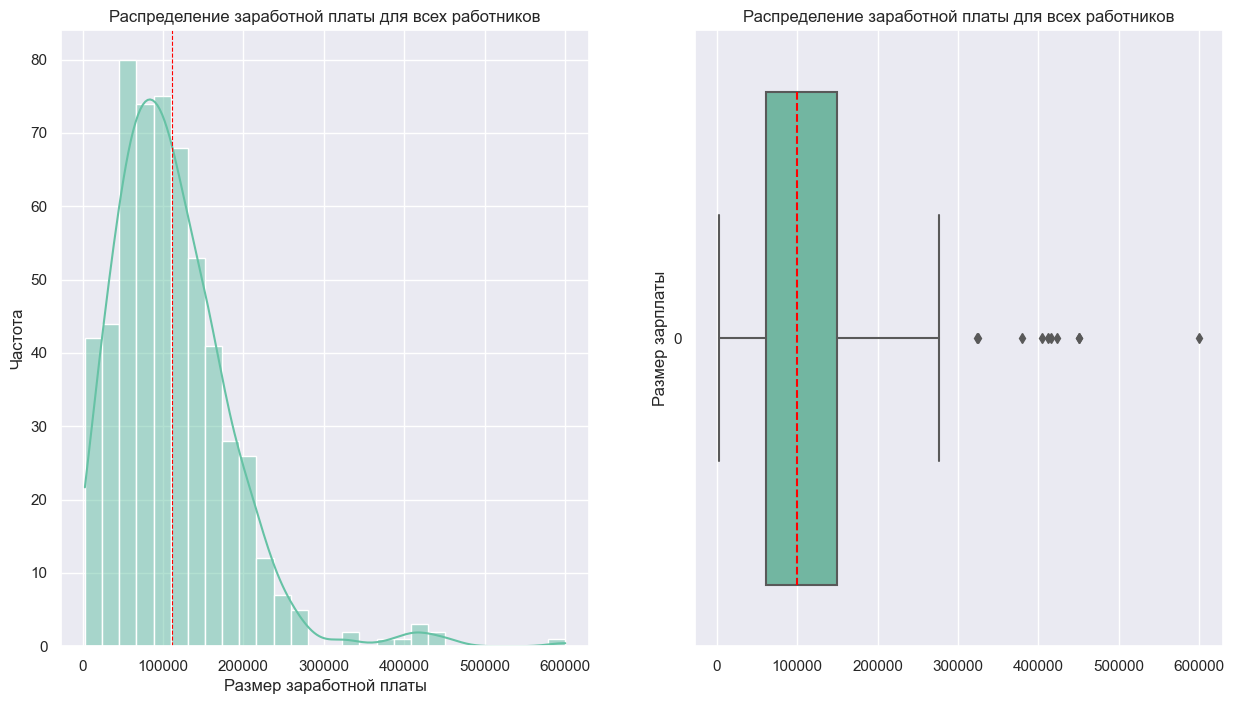

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы', ylabel='Частота')
axes[0].set_title('Распределение заработной платы для всех работников')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер зарплаты')
axes[1].set_title('Распределение заработной платы для всех работников')

plt.show()

In [8]:
data_agg = data['salary_in_usd'].describe().round(0).to_frame()
data_agg.columns = ['Размер заработной платы']
data_agg

,Размер заработной платы
count,565.0
mean,110610.0
std,72281.0
min,2859.0
25%,60757.0
50%,100000.0
75%,150000.0
max,600000.0


Распределение заработной платы отлично от нормального, имеются выбросы.

### Заработная плата в зависимости от уровня опыта

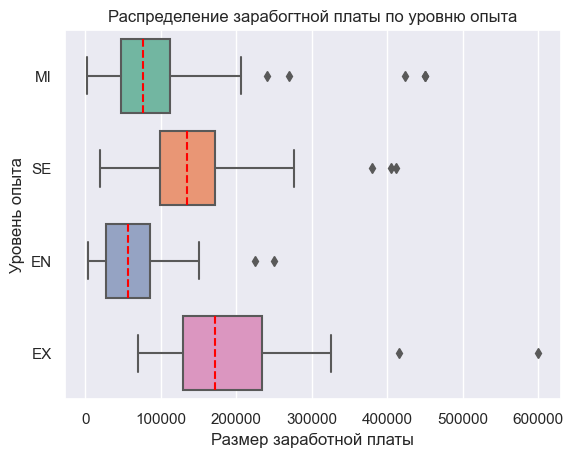

In [9]:
ax = sns.boxplot(data, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Уровень опыта')
plt.title('Распределение зарабогтной платы по уровню опыта')
plt.show()

In [10]:
data_agg = data.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от уровня опыта')
data_agg

Заработная плата в зависимости от уровня опыта


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0
MI,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
SE,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0


Распределение заработной платы в зависимости от опыта различна на первый взгляд.Скорее всего этот фактор влият на зарплату.Чтобы понять являются ли эти различия статистически значимыми в следующем разделе проведем статистическое тестирование

### Заработная плата в зависимости от года

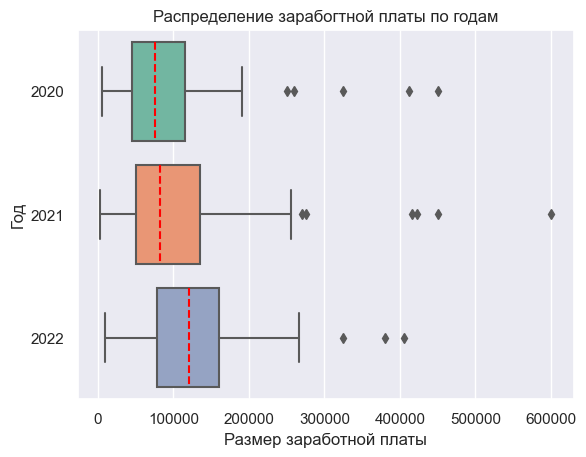

In [11]:
ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Год')
plt.title('Распределение зарабогтной платы по годам')
plt.show()

In [12]:
data_agre = data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от уровня опыта')
data_agre

Заработная плата в зависимости от уровня опыта


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,215.0,99430.41,80304.32,2859.0,50000.0,82528.0,135000.0,600000.0
2022,278.0,123089.10,59888.93,10000.0,78791.0,120000.0,160000.0,405000.0


На первый взгляд с каждым годом заработная плата растет. Чтобы определить, являются ли эти рост статистически значимым, в следующем разделе мы проведём статистическое тестирование.

### Соотношение зарплат Data Engineer и Data Scientist в различных компаниях?

In [13]:
popular_job_title = data['job_title'].value_counts().nlargest(2).index
data['job_title'] = data['job_title'].apply(lambda x: x if x in popular_job_title  else 'other')

top_company_location = data['company_location'].value_counts().nlargest(5).index
data['company_location'] = data['company_location'].apply(lambda x: x if x in top_company_location  else 'other')


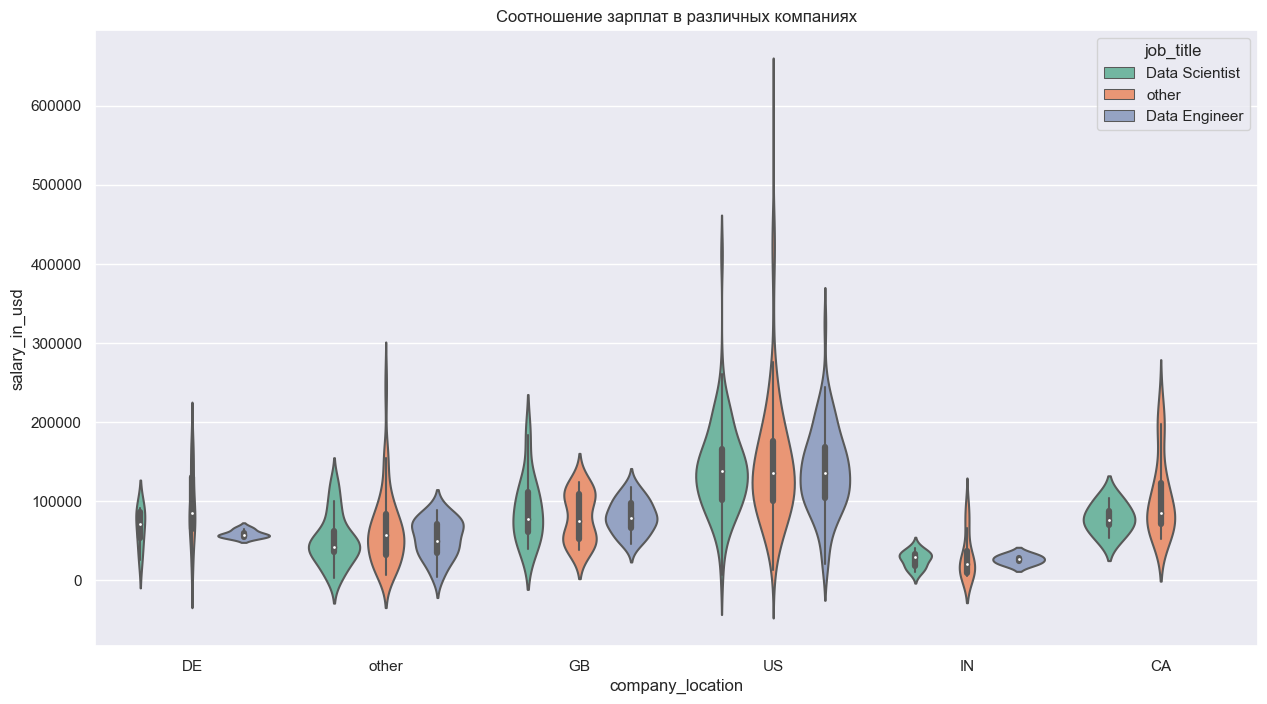

In [14]:

fig, axes = plt.subplots(1, figsize=(15, 8))
sns.violinplot(data=data, x=data['company_location'], y=data['salary_in_usd'], hue='job_title')
axes.set_title("Соотношение зарплат в различных компаниях")
plt.show()

Соотношение зарплат приблизительно одинаковое в различных компаниях у Data Scientist и Data Engineer.в следующем разделе проведем статистическое тестирование

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

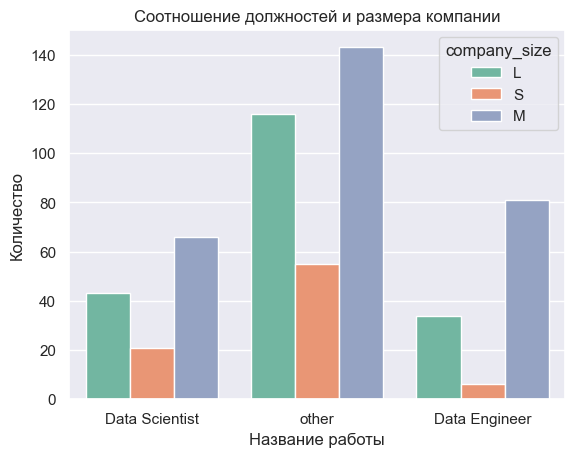

In [15]:
ax = sns.countplot(data=data, x=data['job_title'], hue='company_size')
ax.set(xlabel='Название работы', ylabel='Количество')
plt.title('Соотношение должностей и размера компании')
plt.show()

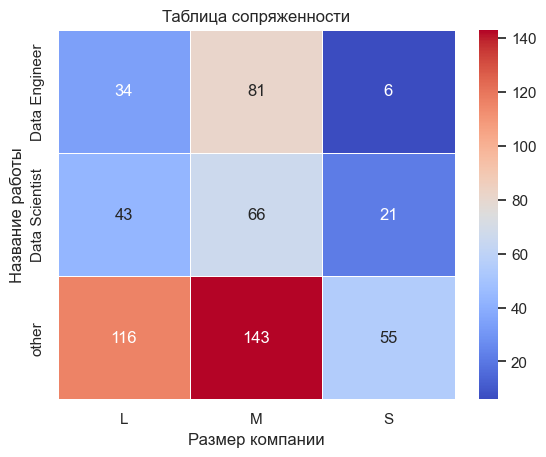

In [16]:
cross_tab = pd.crosstab(index=data['job_title'], columns=data['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Название работы')
plt.title('Таблица сопряженности')
plt.show()

Согласно данным связь между должностями и размером компании либо отрицательная,либо ее нет. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

## Статистический анализ данных



In [17]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ежегодный рост зарплат ($μ_1$) статистически понижается либо равен ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): ежегодный рост зарплат ($μ_1$) статистически растет ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [18]:
# значения лет зарплаты
ds = data[data['job_title'] == "Data Scientist"]
salary_2020 = ds.loc[ds['work_year'] == 2020, 'salary_in_usd']
salary_2021 = ds.loc[ds['work_year'] == 2021, 'salary_in_usd']
salary_2022 = ds.loc[ds['work_year'] == 2022, 'salary_in_usd']
# проводим тест Шапиро-Уилка
print('Для 2020 года:')
result = stats.shapiro(salary_2020)
decision_normality(result[1])

print('Для 2021 года')
result = stats.shapiro(salary_2021)
decision_normality(result[1])

print('Для 2022 года:')
result = stats.shapiro(salary_2022)
decision_normality(result[1])

Для 2020 года:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2021 года
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для 2022 года:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Ежегодный рост зарплат»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать критерий Краскела-Уоллиса для сравнения распределений на основе рангов.

**Проведём тест**

In [19]:
# проводим тест
_, p = stats.kruskal(salary_2020, salary_2021, salary_2022)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Все основания утверждать что у специалистов Data Science заработная плата растет с каждым годом.

### Влияет ли фактор общего обьема работ выполненного удаленно на зарплату у специалистов Data Scientist

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): фактор общего обьема работ удаленно не влияет

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза* ($H_1$): фактор общего обьема работ удаленно влияет

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [20]:
#Значение зарплаты от удаленной работы
rr_null_salary = data.loc[data['remote_ratio']==0, 'salary_in_usd']
rr_half_salary = data.loc[data['remote_ratio']==50, 'salary_in_usd']
rr_full_salary = data.loc[data['remote_ratio']==100, 'salary_in_usd']


# проводим тест Шапиро-Уилка
print('Для работника работающего не удаленно:')
result = stats.shapiro(rr_null_salary)
decision_normality(result[1])

print('Для работников работающих наполовину удаленно:')
result = stats.shapiro(rr_half_salary)
decision_normality(result[1])

print('Для работников полностью работающих удаленно:')
result = stats.shapiro(rr_full_salary)
decision_normality(result[1])



Для работника работающего не удаленно:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для работников работающих наполовину удаленно:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для работников полностью работающих удаленно:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Фактор работы удаленно»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать Критерий Краскела-Уоллиса.

**Проведём тест**

In [35]:
_, p = stats.kruskal(rr_null_salary, rr_half_salary, rr_full_salary)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Фактор удаленной работы влияет на заработную плату.

### Влияет ли фактор типа занятости на зарплату у специалистов Data Scientist

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): фактор типа занятости не влияет на заработную плату.

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

*Альтернативная гипотеза* ($H_1$): фактор типа занятости  влияет на заработную плату.

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [21]:
#Значение зарплаты от типа занятости
emp_pt_salary = data.loc[data['employment_type']=='PT', 'salary_in_usd']
emp_ft_salary = data.loc[data['employment_type']=='FT', 'salary_in_usd']
emp_ct_salary = data.loc[data['employment_type']=='CT', 'salary_in_usd']
emp_fl_salary = data.loc[data['employment_type']=='FL', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для среднего уровня сотрудника:')
result = stats.shapiro(emp_pt_salary)
decision_normality(result[1])

print('Для сотрудников новичков:')
result = stats.shapiro(emp_ft_salary)
decision_normality(result[1])

print('Для сотрудников уровня сеньор:')
result = stats.shapiro(emp_ct_salary)
decision_normality(result[1])

print('Для экспертов:')
result = stats.shapiro(emp_fl_salary)
decision_normality(result[1])

Для среднего уровня сотрудника:
p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для сотрудников новичков:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для сотрудников уровня сеньор:
p-value = 0.406
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для экспертов:
p-value = 0.507
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Фактор типа занятости»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать Критерий Краскела-Уоллиса.

**Проведём тест**

In [22]:
# проводим тест
_, p = stats.kruskal(emp_pt_salary, emp_ft_salary, emp_fl_salary, emp_ct_salary)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Фактор типа занятости влияет на заработную плату.

### Влияет ли фактор опыта на зарплату у специалистов Data Scientist?


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): фактор опыта не влияет на заработную плату .

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

*Альтернативная гипотеза* ($H_1$): фактор опыта  влияет на заработную плату.

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [23]:
# значения заработной платы

exp_mi_salary = data.loc[data['experience_level']=='MI', 'salary_in_usd']
exp_se_salary = data.loc[data['experience_level']=='SE', 'salary_in_usd']
exp_en_salary = data.loc[data['experience_level']=='EN', 'salary_in_usd']
exp_ex_salary = data.loc[data['experience_level']=='EX', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для среднего уровня сотрудника:')
result = stats.shapiro(exp_mi_salary)
decision_normality(result[1])

print('Для сотрудников новичков:')
result = stats.shapiro(exp_en_salary)
decision_normality(result[1])

print('Для сотрудников уровня сеньор:')
result = stats.shapiro(exp_se_salary)
decision_normality(result[1])

print('Для экспертов:')
result = stats.shapiro(exp_ex_salary)
decision_normality(result[1])

Для среднего уровня сотрудника:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для сотрудников новичков:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для сотрудников уровня сеньор:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для экспертов:
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Фактор опыта»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать Критерий Краскела-Уоллиса.

**Проведём тест**


In [24]:
# проводим тест
_, p = stats.kruskal(exp_mi_salary, exp_se_salary, exp_en_salary, exp_ex_salary)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Фактор опыта влияет на заработную плату.

### Влияет ли фактор размера компании на заработную плату?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер компании не влияет на заработную плату: малая ($μ_1$), средняя ($μ_2$), большая ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер компании влияет на заработную плату: малая ($μ_1$), средняя ($μ_2$), большая ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [25]:
# значения заработной платы
ds = data[data['job_title'] == "Data Scientist"]
size_s_salary = ds.loc[ds['company_size']=='S', 'salary_in_usd']
size_m_salary = ds.loc[ds['company_size']=='M', 'salary_in_usd']
size_l_salary = ds.loc[ds['company_size']=='L', 'salary_in_usd']


# проводим тест Шапиро-Уилка
print('Для малой компании:')
result = stats.shapiro(size_s_salary)
decision_normality(result[1])

print('Для средней компании:')
result = stats.shapiro(size_m_salary)
decision_normality(result[1])

print('Для большой компании:')
result = stats.shapiro(size_l_salary)
decision_normality(result[1])


Для малой компании:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для средней компании:
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для большой компании:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Фактор размера компании»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать Критерий Краскела-Уоллиса.

**Проведём тест**


In [26]:
# проводим тест
_, p = stats.kruskal(size_s_salary, size_m_salary, size_l_salary)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Фактор размера компании влияет на заработную плату.

### Соотношение зарплат Data Engineer и Data Scientist в разных кампаниях?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: соотношения зарплат равны: Data Engineer ($μ_1$), Data Scientist ($μ_2$)

$$ H_0 : μ_1 = μ_2$$

*Альтернативная гипотеза*: соотношения зарплат не равны: Data Engineer ($μ_1$), Data Scientist ($μ_2$)

$$ H_1 : μ_1 \neq μ_2$$



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [27]:
# группируем данные по компаниям и профессиям преобразуем в датафрейм со средней заработной платой
data_new = data.groupby(['company_location','job_title'])['salary_in_usd'].mean().unstack()
data_new = data_new.fillna(0)
data_new = round(data_new)
#Проверим
job_dst_salary = data_new['Data Scientist']
job_der_salary = data_new['Data Engineer']


# проводим тест Шапиро-Уилка
print('Для Инженера данных:')
result = stats.shapiro(job_der_salary)
decision_normality(result[1])

print('Для Ученого над данными:')
result = stats.shapiro(job_dst_salary)
decision_normality(result[1])

Для Инженера данных:
p-value = 0.858
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для Ученого над данными:
p-value = 0.842
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Фактор выбора работы»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Да. 

Для проверки нашей гипотезы можно использовать Парный t-критерий.

**Проведём тест**

In [28]:
# проводим тест
_, p = stats.ttest_rel(job_der_salary, job_dst_salary)
decision_hypothesis(p)

p-value = 0.277
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать, что есть разница в зарплате между Data Engineer и Data Scientist в разных компаниях

### Общий вывод по тому вопросу какие факторы влияют на заработную плату Data Scientist
На зарплату Data Scientist влияют следующие факторы:
- Год работы
- Размер компании
- Сама компания
- Уровень опыта
- Тип занятости
- Удаленная работа

### Была ли зарплата Data Scientist выше зарплаты Data Engineer за 2022 год?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: соотношения зарплат за 2022 год: Data Scientist ($μ_1$) ниже или равна Data Engineer ($μ_2$)

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза*: соотношения зарплат за 2022 год: Data Scientist ($μ_1$) выше Data Engineer ($μ_2$)

$$ H_1 : μ_1 > μ_2$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [29]:
# значения заработной платы и создание доп признака по году
DS = data[data['work_year'] == 2022] 
job_de_salary = DS.loc[DS['job_title']=='Data Engineer', 'salary_in_usd']
job_ds_salary = DS.loc[DS['job_title']=='Data Scientist', 'salary_in_usd']


# проводим тест Шапиро-Уилка
print('Для Инженера данных:')
result = stats.shapiro(job_de_salary)
decision_normality(result[1])

print('Для Ученого над данными:')
result = stats.shapiro(job_ds_salary)
decision_normality(result[1])


Для Инженера данных:
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для Ученого над данными:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Сравнение зарплат у двух профессий»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать U-критерий Манна — Уитни .

**Проведём тест**

In [30]:
_, p = stats.mannwhitneyu(job_ds_salary, job_de_salary)
decision_hypothesis(p)

p-value = 0.319
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Зарплата Data Scientist была либо меньше либо равна Data Engineer за 2022 год 

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между наличием должностей и размером компании нет связи (признаки независимы).

*Альтернативная гипотеза*: между наличием должностей и размером компании есть связь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер компании»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [31]:
# составляем таблицу сопряжённости
data_base = data[(data['job_title']=='Data Scientist') | (data['job_title']=='Data Engineer')]
cross_table = pd.crosstab(data['company_size'], data_base['job_title'])

cross_table

job_title,Data Engineer,Data Scientist
company_size,,
L,34,43
M,81,66
S,6,21


In [32]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между профессиями Data Science и Data Engineer и размером компании

## Дополнительное исследование
### Проверяем больше ли зарплата у эксперта Data Scientist 100000?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: заработная плата у эсперта ($μ_1$) ниже или равна 100000 ($μ_2$)

$$ H_0 : μ_1 <= 100000$$

*Альтернативная гипотеза*: заработная плата у эксперта ($μ_1$) выше 1000000 

$$ H_1 : μ_1 > 100000$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [33]:
# значения заработной платы и создание доп признака по году
exp_salary = DS.loc[DS['experience_level']=='EX', 'salary_in_usd']



# проводим тест Шапиро-Уилка
print('Для Уровня эксперта:')
result = stats.shapiro(exp_salary)
decision_normality(result[1])

Для Уровня эксперта:
p-value = 0.816
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Больше ли зарплата эксперта 100000»? — Количественный.
* Сколько сравниваемых групп? — Одна.
* Признак распределён по нормальному закону? — Да. 

Для проверки нашей гипотезы можно использовать Одновыборочный t-критерий.

**Проведём тест**

In [34]:
_, p = stats.ttest_1samp(exp_salary, 100000)
decision_hypothesis(p)

p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


### Вывод:

Заработная плата эксперта Data Scientist больше 100000

## Итоговые результаты исследования

*   Все основания что заработная плата у Data Scientist с каждым годом растет
*   Почти все категориальные факторы влияют на заработную плату
*   Зарплата у Data Enginner и Data Science в различных компания примерно одинакова.
*   Зарплата Data Scientist и Data Engineer за 2022 примерно одинакова.
*   Между наличием должностей и размером компании есть связь.

Примечание:Использованы все виды групповых тестов и категориальный тест